In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = '../20250108_NH3/'
file = os.listdir(path)

dfs = []
for f in file[5:81]:
    dfs.append(pd.read_csv(path+f, index_col='Time'))    
df = pd.concat(dfs, ignore_index=True)
print(df.shape)
df.head()

(7626, 2048)


,49.750000,50.250000,50.750000,51.250000,51.760000,52.260000,52.760000,53.260000,53.760000,54.260000,...,1186.380000,1186.990000,1187.590000,1188.200000,1188.810000,1189.410000,1190.020000,1190.630000,1191.240000,1191.840000
0,-40.0,-33.0,3.0,-7.0,12.0,38.0,-5.0,13.0,4.0,-29.0,...,-23.0,-5.0,-24.0,3.0,-6.0,41.0,-14.0,-35.0,-21.0,-15.0
1,-31.0,-25.0,15.0,5.0,11.0,29.0,-12.0,13.0,-2.0,-26.0,...,-18.0,-2.0,-18.0,11.0,-2.0,55.0,-4.0,-31.0,-20.0,-2.0
2,-36.0,-25.0,7.0,10.0,12.0,37.0,-7.0,5.0,-3.0,-21.0,...,-18.0,12.0,-29.0,9.0,5.0,45.0,0.0,-44.0,-23.0,-3.0
3,-36.0,-23.0,21.0,8.0,16.0,43.0,-8.0,-2.0,-4.0,-34.0,...,-16.0,5.0,-27.0,-1.0,1.0,63.0,-5.0,-32.0,-21.0,0.0
4,-33.0,-17.0,4.0,0.0,18.0,35.0,6.0,5.0,9.0,-18.0,...,-14.0,12.0,-15.0,-3.0,-18.0,61.0,-11.0,-18.0,-25.0,-5.0


In [11]:
def DropFromSecond(x):
    x = x * 10
    x = np.floor(x)
    return x/10

# Given the spectrometer measures 200 - 1100 nn, drop columns outside this range
# df = df[df.columns[296:]]
new_col = [DropFromSecond(x) for x in df.columns.astype(float)]
df.columns = new_col
df.index = [0.6*i for i in range(len(df.index))]
df.head()

,49.7,50.2,50.7,51.2,51.7,52.2,52.7,53.2,53.7,54.2,...,1186.3,1186.9,1187.5,1188.2,1188.8,1189.4,1190.0,1190.6,1191.2,1191.8
0.0,-40.0,-33.0,3.0,-7.0,12.0,38.0,-5.0,13.0,4.0,-29.0,...,-23.0,-5.0,-24.0,3.0,-6.0,41.0,-14.0,-35.0,-21.0,-15.0
0.6,-31.0,-25.0,15.0,5.0,11.0,29.0,-12.0,13.0,-2.0,-26.0,...,-18.0,-2.0,-18.0,11.0,-2.0,55.0,-4.0,-31.0,-20.0,-2.0
1.2,-36.0,-25.0,7.0,10.0,12.0,37.0,-7.0,5.0,-3.0,-21.0,...,-18.0,12.0,-29.0,9.0,5.0,45.0,0.0,-44.0,-23.0,-3.0
1.8,-36.0,-23.0,21.0,8.0,16.0,43.0,-8.0,-2.0,-4.0,-34.0,...,-16.0,5.0,-27.0,-1.0,1.0,63.0,-5.0,-32.0,-21.0,0.0
2.4,-33.0,-17.0,4.0,0.0,18.0,35.0,6.0,5.0,9.0,-18.0,...,-14.0,12.0,-15.0,-3.0,-18.0,61.0,-11.0,-18.0,-25.0,-5.0


In [12]:
# extact 20, 40 and 60 cycles
c20 = df[(df.index >= 1320) & (df.index <=1370)]
c40 = df[(df.index >= 2670) & (df.index <=2720)] # 50s
c60 = df[(df.index >= 4020) & (df.index <=4070)]
c20.head()

,49.7,50.2,50.7,51.2,51.7,52.2,52.7,53.2,53.7,54.2,...,1186.3,1186.9,1187.5,1188.2,1188.8,1189.4,1190.0,1190.6,1191.2,1191.8
1320.0,-37.0,-27.0,11.0,7.0,3.0,35.0,-2.0,7.0,-11.0,-30.0,...,-20.0,-8.0,-3.0,5.0,2.0,50.0,-12.0,-15.0,-15.0,1.0
1320.6,-25.0,-27.0,18.0,7.0,9.0,61.0,-3.0,-11.0,-9.0,-24.0,...,-20.0,-4.0,-26.0,-16.0,6.0,52.0,-13.0,-26.0,-17.0,-5.0
1321.2,-44.0,-17.0,1.0,5.0,4.0,38.0,-10.0,-4.0,-12.0,-15.0,...,-30.0,10.0,-9.0,-7.0,8.0,34.0,2.0,-19.0,-19.0,-16.0
1321.8,-38.0,-32.0,12.0,5.0,9.0,38.0,1.0,0.0,2.0,-25.0,...,-31.0,2.0,-21.0,-1.0,-2.0,51.0,-13.0,-18.0,-19.0,-6.0
1322.4,-35.0,-22.0,18.0,0.0,16.0,32.0,-5.0,5.0,-4.0,-21.0,...,-26.0,-2.0,-18.0,-5.0,9.0,49.0,-5.0,-15.0,-31.0,-5.0


In [13]:
c20_log = c20.copy()
c40_log = c40.copy()
c60_log = c60.copy()

x_20 = [0.6*i for i in range(len(c20.index))]
y_20 = c20.columns.tolist()
x_40 = [0.6*i for i in range(len(c40.index))]
y_40 = c40.columns.tolist()
x_60 = [0.6*i for i in range(len(c60.index))]
y_60 = c60.columns.tolist()

# absolute
for i in range(len(c20.index)):
    for j in range(len(c20.columns)):
        if c20.iloc[i,j]<0:
            c20.iloc[i,j]=0
# log
for i in range(len(c20_log.index)):
    for j in range(len(c20.columns)):
        if c20_log.iloc[i,j]<=1:
            c20_log.iloc[i,j]=0
        else:
            c20_log.iloc[i,j] = np.log10(c20_log.iloc[i,j])

# absolute
for i in range(len(c40.index)):
    for j in range(len(c40.columns)):
        if c40.iloc[i,j]<0:
            c40.iloc[i,j]=0
# log
for i in range(len(c40_log.index)):
    for j in range(len(c40.columns)):
        if c40_log.iloc[i,j]<=1:
            c40_log.iloc[i,j]=0
        else:
            c40_log.iloc[i,j] = np.log10(c40_log.iloc[i,j])

# absolute
for i in range(len(c60.index)):
    for j in range(len(c60.columns)):
        if c60.iloc[i,j]<0:
            c60.iloc[i,j]=0
# log
for i in range(len(c60_log.index)):
    for j in range(len(c60.columns)):
        if c60_log.iloc[i,j]<=1:
            c60_log.iloc[i,j]=0
        else:
            c60_log.iloc[i,j] = np.log10(c60_log.iloc[i,j])

C:\Users\syj43\AppData\Local\Temp\ipykernel_13508\4279822779.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c20.iloc[i,j]=0
C:\Users\syj43\AppData\Local\Temp\ipykernel_13508\4279822779.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c40.iloc[i,j]=0
C:\Users\syj43\AppData\Local\Temp\ipykernel_13508\4279822779.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c60.iloc[i,j]=0


In [14]:
c20_start = 1320
c20_NH3 = c20[(c20.index>=c20_start+4)&(c20.index<=c20_start+18)]

c40_start = 2670
c40_NH3 = c40[(c40.index>=c40_start+10)&(c40.index<=c40_start+24)]

c60_start = 4020
c60_NH3 = c60[(c60.index>=c60_start+14)&(c60.index<=c60_start+27)]

c20_log_NH3 = c20_log[(c20_log.index>=c20_start+4)&(c20_log.index<=c20_start+18)]
c40_log_NH3 = c40_log[(c40_log.index>=c40_start+10)&(c40_log.index<=c40_start+24)]
c60_log_NH3 = c60_log[(c60_log.index>=c60_start+14)&(c60_log.index<=c60_start+27)]

In [24]:
c20_NH3

,49.7,50.2,50.7,51.2,51.7,52.2,52.7,53.2,53.7,54.2,...,1186.3,1186.9,1187.5,1188.2,1188.8,1189.4,1190.0,1190.6,1191.2,1191.8
1324.2,0.0,0.0,6.0,11.0,0.0,31.0,3.0,8.0,0.0,0.0,...,0.0,3.0,5.0,1.0,1.0,44.0,0.0,0.0,0.0,0.0
1324.8,0.0,0.0,19.0,11.0,21.0,36.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,41.0,4.0,0.0,0.0,0.0
1325.4,0.0,0.0,16.0,2.0,13.0,34.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,2.0,52.0,0.0,0.0,0.0,1.0
1326.0,0.0,0.0,13.0,12.0,22.0,36.0,5.0,3.0,8.0,0.0,...,0.0,3.0,0.0,7.0,0.0,51.0,0.0,0.0,0.0,4.0
1326.6,0.0,0.0,23.0,13.0,24.0,33.0,7.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,45.0,0.0,0.0,0.0,0.0
1327.2,0.0,0.0,9.0,0.0,16.0,44.0,0.0,3.0,2.0,0.0,...,0.0,2.0,0.0,0.0,4.0,54.0,0.0,0.0,0.0,0.0
1327.8,0.0,0.0,15.0,4.0,2.0,33.0,0.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,52.0,1.0,0.0,0.0,0.0
1328.4,0.0,0.0,2.0,1.0,4.0,46.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,16.0,38.0,0.0,0.0,0.0,0.0
1329.0,0.0,0.0,13.0,0.0,19.0,26.0,7.0,8.0,4.0,0.0,...,0.0,12.0,0.0,14.0,0.0,51.0,5.0,0.0,0.0,0.0
1329.6,0.0,0.0,11.0,11.0,9.0,21.0,8.0,5.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,47.0,0.0,0.0,0.0,0.0


In [37]:
c20_NH3.loc[:,49.7]

1324.2    0.0
1324.8    0.0
1325.4    0.0
1326.0    0.0
1326.6    0.0
1327.2    0.0
1327.8    0.0
1328.4    0.0
1329.0    0.0
1329.6    0.0
1330.2    0.0
1330.8    0.0
1331.4    0.0
1332.0    0.0
1332.6    0.0
1333.2    0.0
1333.8    0.0
1334.4    0.0
1335.0    0.0
1335.6    0.0
1336.2    0.0
1336.8    0.0
1337.4    0.0
1338.0    0.0
Name: 49.7, dtype: float64

In [55]:
print(new_col[0], new_col[-1])

49.7 1191.8


In [39]:
new_col = np.arange(c20_NH3.columns[0], c20_NH3.columns[-1]+0.1, 0.1)
c20_NH3_inter = pd.DataFrame(columns=new_col, index=[float(round(i,1)) for i in c20_NH3.index])
for idx in range(len(c20_NH3)):
    c20_NH3_inter.iloc[idx] = np.interp(new_col, c20_NH3.columns.values, c20_NH3.iloc[idx])
c20_NH3_inter.index.name = 'time'
c20_NH3_inter

,49.7,49.8,49.9,50.0,50.1,50.2,50.3,50.4,50.5,50.6,...,1190.9,1191.0,1191.1,1191.2,1191.3,1191.4,1191.5,1191.6,1191.7,1191.8
time,,,,,,,,,,,,,,,,,,,,,
1324.2,0.0,0.0,0.0,0.0,0.0,0.0,1.2,2.4,3.6,4.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1324.8,0.0,0.0,0.0,0.0,0.0,0.0,3.8,7.6,11.4,15.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1325.4,0.0,0.0,0.0,0.0,0.0,0.0,3.2,6.4,9.6,12.8,...,0.0,0.0,0.0,0.0,0.166667,0.333333,0.5,0.666667,0.833333,1.0
1326.0,0.0,0.0,0.0,0.0,0.0,0.0,2.6,5.2,7.8,10.4,...,0.0,0.0,0.0,0.0,0.666667,1.333333,2.0,2.666667,3.333333,4.0
1326.6,0.0,0.0,0.0,0.0,0.0,0.0,4.6,9.2,13.8,18.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1327.2,0.0,0.0,0.0,0.0,0.0,0.0,1.8,3.6,5.4,7.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1327.8,0.0,0.0,0.0,0.0,0.0,0.0,3.0,6.0,9.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1328.4,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.8,1.2,1.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1329.0,0.0,0.0,0.0,0.0,0.0,0.0,2.6,5.2,7.8,10.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
c20_NH3_inter.loc[:,'434.2']

time
1324.2    63.0
1324.8    55.0
1325.4    40.0
1326.0    54.0
1326.6    55.0
1327.2    64.0
1327.8    73.0
1328.4    57.0
1329.0    67.0
1329.6    64.0
1330.2    71.0
1330.8    65.0
1331.4    55.0
1332.0    50.0
1332.6    64.0
1333.2    74.0
1333.8    77.0
1334.4    54.0
1335.0    54.0
1335.6    68.0
1336.2    59.0
1336.8    74.0
1337.4    75.0
1338.0    38.0
Name: 434.2, dtype: object

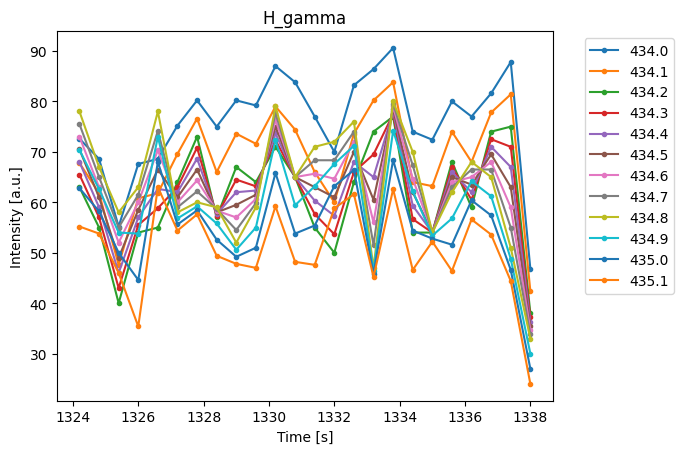

In [70]:
target_wv = [round(j,1) for j in np.arange(434.0, 435.1, 0.1)] # H_gamma
for i in target_wv:
    plt.plot(c20_NH3_inter.loc[:,str(i)], '.-') #range(len(c20_NH3_inter))
plt.legend(target_wv, bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Time [s]')
plt.ylabel('Intensity [a.u.]')
plt.title('H_gamma')
plt.show()

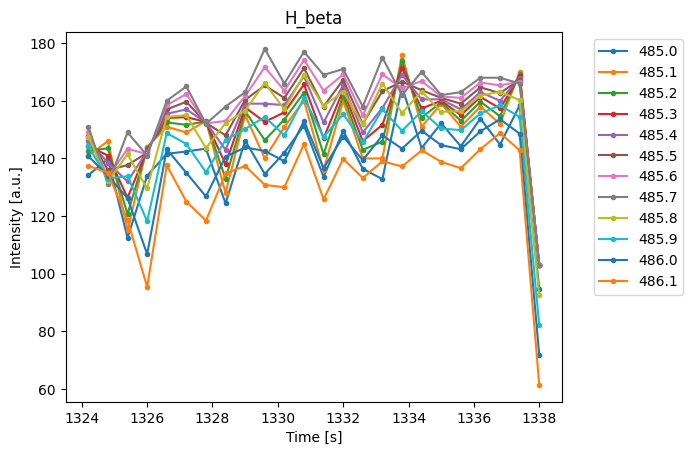

In [71]:
target_wv = [round(j,1) for j in np.arange(485.0, 486.1, 0.1)] # H_beta
for i in target_wv:
    plt.plot(c20_NH3_inter.loc[:,str(i)], '.-') #range(len(c20_NH3_inter))
plt.legend(target_wv, bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Time [s]')
plt.ylabel('Intensity [a.u.]')
plt.title('H_beta')
plt.show()

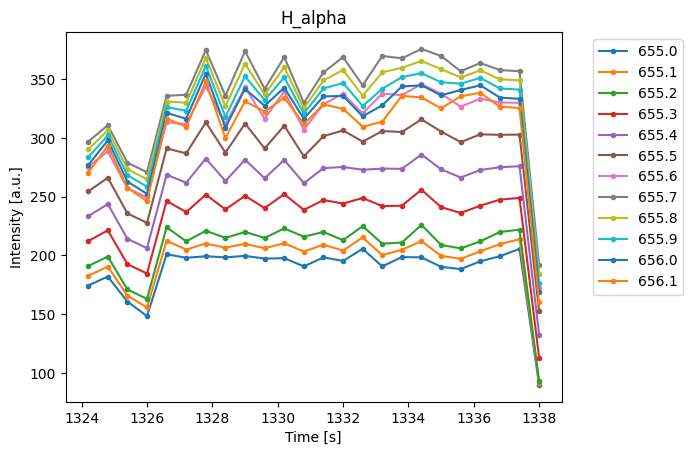

In [72]:
target_wv = [round(j,1) for j in np.arange(655.0, 656.1, 0.1)] # H_alpha
for i in target_wv:
    plt.plot(c20_NH3_inter.loc[:,str(i)], '.-') #range(len(c20_NH3_inter))
plt.legend(target_wv, bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Time [s]')
plt.ylabel('Intensity [a.u.]')
plt.title('H_alpha')
plt.show()

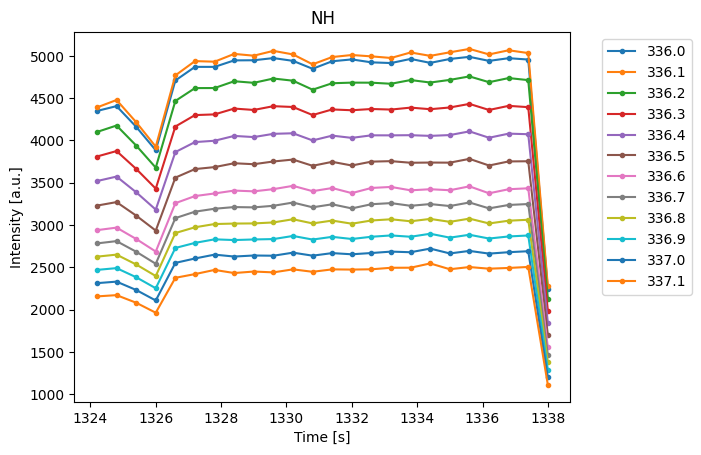

In [73]:
target_wv = [round(j,1) for j in np.arange(336.0, 337.1, 0.1)] # NH
for i in target_wv:
    plt.plot(c20_NH3_inter.loc[:,str(i)], '.-') #range(len(c20_NH3_inter))
plt.legend(target_wv, bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Time [s]')
plt.ylabel('Intensity [a.u.]')
plt.title('NH')
plt.show()

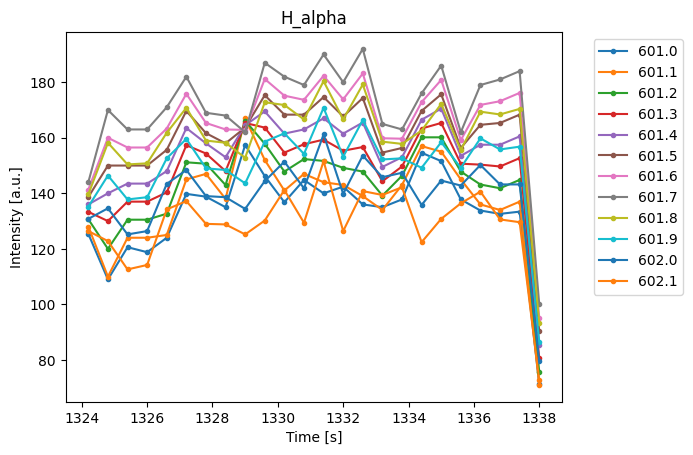

In [74]:
target_wv = [round(j,1) for j in np.arange(601, 602.1, 0.1)] # H2
for i in target_wv:
    plt.plot(c20_NH3_inter.loc[:,str(i)], '.-') #range(len(c20_NH3_inter))
plt.legend(target_wv, bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Time [s]')
plt.ylabel('Intensity [a.u.]')
plt.title('H_alpha')
plt.show()

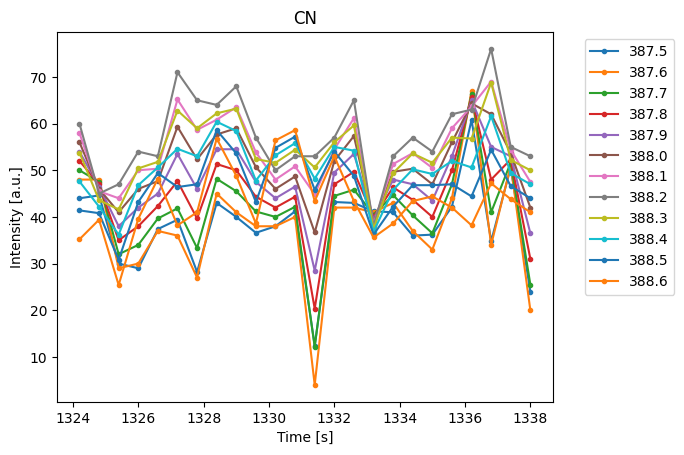

In [76]:
target_wv = [round(j,1) for j in np.arange(387.5, 388.6, 0.1)] # CN
for i in target_wv:
    plt.plot(c20_NH3_inter.loc[:,str(i)], '.-') #range(len(c20_NH3_inter))
plt.legend(target_wv, bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Time [s]')
plt.ylabel('Intensity [a.u.]')
plt.title('CN')
plt.show()

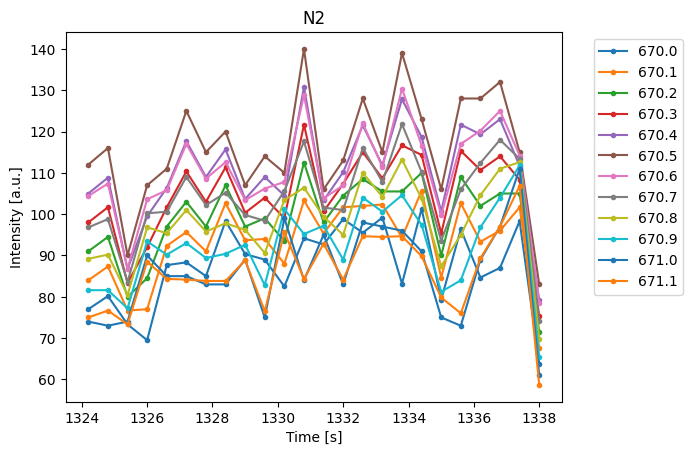

In [77]:
target_wv = [round(j,1) for j in np.arange(670, 671.1, 0.1)] # N2
for i in target_wv:
    plt.plot(c20_NH3_inter.loc[:,str(i)], '.-') #range(len(c20_NH3_inter))
plt.legend(target_wv, bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Time [s]')
plt.ylabel('Intensity [a.u.]')
plt.title('N2')
plt.show()

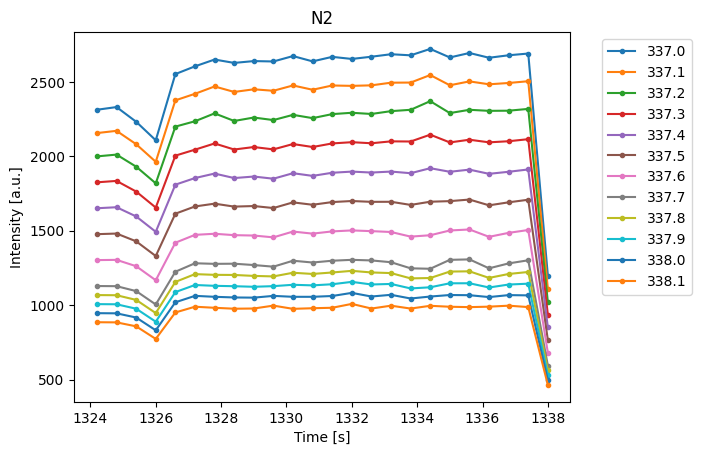

In [78]:
target_wv = [round(j,1) for j in np.arange(337, 338.1, 0.1)] # N2
for i in target_wv:
    plt.plot(c20_NH3_inter.loc[:,str(i)], '.-') #range(len(c20_NH3_inter))
plt.legend(target_wv, bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Time [s]')
plt.ylabel('Intensity [a.u.]')
plt.title('N2')
plt.show()

In [ ]:
# scaling each coloumn